<a href="https://colab.research.google.com/github/NAHIN-JZS/Data_mining_Sessional/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
Welcome to the Data Preprocessing Techniques Lab! In this session, we will explore a range of essential data preprocessing techniques that are commonly used to clean, transform, and prepare data for analysis and modeling. We will use the "Titanic Dataset," which contains passenger information from the Titanic, as our example dataset. Throughout this lab, you'll learn how to handle various challenges in real-world data and make it suitable for analysis.

Let's dive into the world of data preprocessing!

#1. Handling Missing Data
Explanation:
Missing data can distort analysis and modeling. In this section, we'll learn how to identify and handle missing values.

#Lab Work:
1. Load the Dataset

2. Check for Missing Values

3. Replace Missing Values with the median values

4. Remove Rows with Missing Values

5. Remove redundant columns


#Solution


1. Use Pandas to load the Titanic dataset
2. Use isna() to identify missing values in the dataset.
3. Use the median value to fill missing values in the "Age" column.
4. Use dropna() to remove rows with missing values in the "Embarked" column.

In [31]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_data.nunique()
#418 unique passengers

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [38]:
(titanic_data['Age'] <18).sum()

113

In [40]:
import numpy as np
#Categorize based on age group
# 0-17 - Children
# 18-39 - Youth
# 40-59 - MiddleAged
# 60+ - SeniorCitizens
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
titanic_data['AgeGrp'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)
titanic_data['AgeGrp'].value_counts().values

array([438, 137, 113,  26])

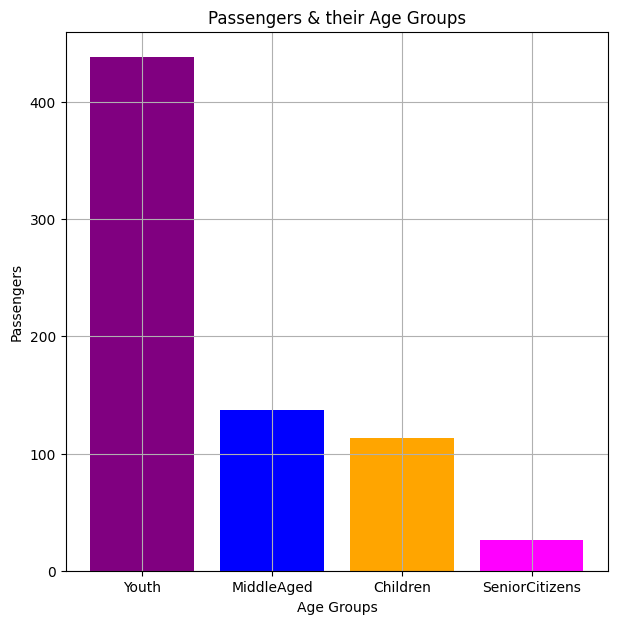

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(titanic_data['AgeGrp'].value_counts().keys(),titanic_data['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

<ipython-input-43-e979f257292a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)


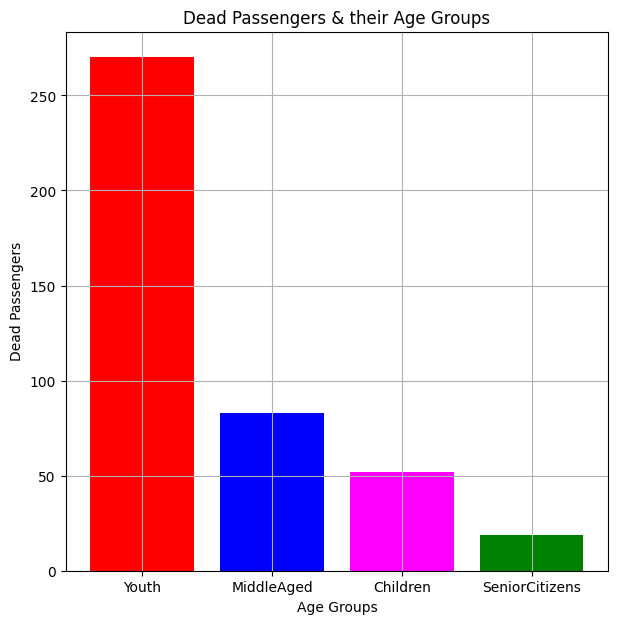

In [43]:
dead = titanic_data[titanic_data['Survived']==0]

#Categorize based on age group for dead
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

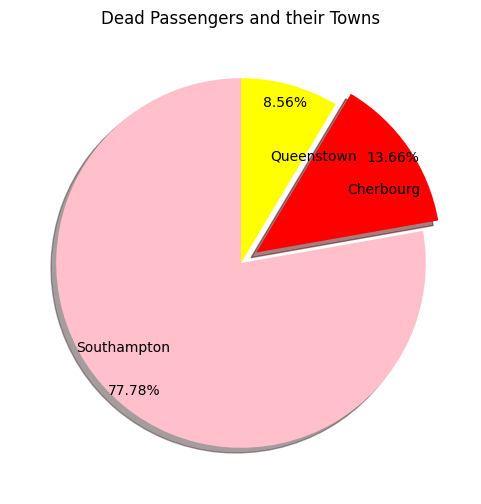

In [44]:
plt.figure(figsize=(6,6))
plt.title('Dead Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(dead['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['pink','red','yellow'],explode=explode,shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

## Find out the age group and cities for survived

<ipython-input-45-31704c451150>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)


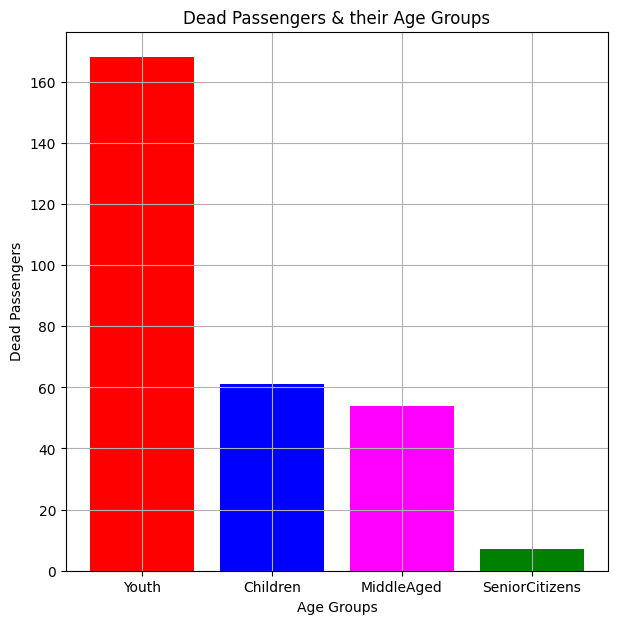

In [45]:
survived = titanic_data[titanic_data['Survived']==1]

#Categorize based on age group for dead
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

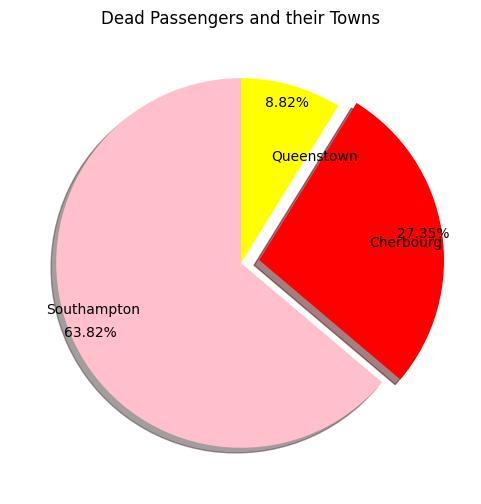

In [46]:
plt.figure(figsize=(6,6))
plt.title('Dead Passengers and their Towns')
#shadow=True
explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['pink','red','yellow'],explode=explode,shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

## Handling the missing values

In [32]:
# Check for missing values
missing_values = titanic_data.isna().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Replace missing values in "Age" column with median age
median_age = titanic_data['Age'].median()
titanic_data['Age'].fillna(median_age, inplace=True)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Remove rows with missing values in "Embarked" column
titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
titanic_data = titanic_data.drop('Cabin',axis=1)
titanic_data = titanic_data.drop('Ticket',axis=1)
# titanic_data = titanic_data.drop('Name',axis=1)
# titanic_data = titanic_data.drop('PassengerId',axis=1)

titanic_data = titanic_data.drop(['PassengerId','Name'],axis=1)
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
titanic_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

# Encoding Categorical Variables
Categorical variables need transformation for machine learning. We'll cover one-hot encoding and label encoding.

##get_dummies():
The get_dummies() function is a feature in Pandas that performs one-hot encoding. One-hot encoding converts categorical variables into a binary matrix, where each unique category becomes a new binary column, representing the presence or absence of that category for each observation.

get_dummies() creates new columns for each unique category in the categorical column, where a '1' indicates the presence of that category, and '0' indicates its absence. This transformation is beneficial when there is no ordinal relationship between categories, and each category is treated as an independent attribute.

In [47]:

# df_train['Sex'] = df_train['Sex'].apply(lambda x : 1 if x == 'male' else 0)

# One-Hot Encoding for "Embarked" column
embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
titanic_data = pd.concat([titanic_data, embarked_dummies], axis=1)


## LabelEncoder:
The LabelEncoder is a utility class from the Scikit-learn library that is used to convert categorical values into numerical labels. It's particularly useful when dealing with categorical data that have an inherent ordinal relationship. An ordinal relationship implies that the categories have a meaningful order, such as "low," "medium," and "high." Here's how LabelEncoder works:

When you have a categorical column, such as "Sex" with values "male" and "female," you can use LabelEncoder to transform these categorical values into numeric labels. It assigns a unique numerical label to each unique category in the column. This encoding is performed in such a way that the encoded values reflect the order of the original categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for "Sex" column
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

##apply function of Pandas DataFrame
The apply function allows you to apply a function along the axis of a DataFrame or to specific columns. It's often used to apply custom functions or operations to the data.

Example:
Suppose you have a column "Age" and you want to create a new column "Age_category" based on a custom function that categorizes ages.

In [48]:
# Sample data
data = {'Age': [25, 30, 18, 40, 60]}

# Create a DataFrame
df = pd.DataFrame(data)

# Custom function to categorize age
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age < 30:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the custom function to create a new column
df['Age_category'] = df['Age'].apply(categorize_age)

print(df)

   Age Age_category
0   25  Young Adult
1   30        Adult
2   18  Young Adult
3   40        Adult
4   60       Senior


###Lambda functions


Lambda functions, also known as anonymous functions, are small and concise functions in Python that can have any number of arguments but only one expression. They are often used for short tasks where defining a full function using the def keyword might be unnecessary or less readable. Lambda functions are particularly handy when you need a simple function for a short period of time, such as for passing as an argument to higher-order functions like map, filter, or sorted.

Here's the basic syntax of a lambda function:


` lambda arguments: expression`

In [ ]:
# df_train['Sex'] = df_train['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization for "Age" and "Fare" columns
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Min-Max Scaling for "SibSp" and "Parch" columns
minmax_scaler = MinMaxScaler()
titanic_data[['SibSp', 'Parch']] = minmax_scaler.fit_transform(titanic_data[['SibSp', 'Parch']])


#Feature scaling
Feature scaling is a crucial preprocessing step in machine learning that involves transforming the numerical features of a dataset to a common scale. It ensures that all features contribute equally to the analysis and prevents any particular feature from dominating the others due to its larger magnitude. Many machine learning algorithms perform better or converge faster when features are on a similar scale.

## Standardization (Z-score normalization):
Standardization transforms the features such that they have a mean of 0 and a standard deviation of 1. It centers the data around zero, allowing the distribution to retain its shape. Standardization is suitable when the features have varying scales and the algorithm assumes that the features are normally distributed.

Formula for standardization:


```
z = (x - μ) / σ
Where:

x is the original feature value.
μ is the mean of the feature.
σ is the standard deviation of the feature.
```





##Min-Max Scaling (Normalization):
Min-Max Scaling transforms the features to a specific range, usually between 0 and 1. It's useful when the distribution of the features is not necessarily Gaussian and you want to preserve the relationship between the original values. However, Min-Max Scaling might be sensitive to outliers.

Formula for Min-Max Scaling:
```
x_scaled = (x - x_min) / (x_max - x_min)
Where:

x is the original feature value.
x_min is the minimum value of the feature.
x_max is the maximum value of the feature.
```

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data
data = {'Age': [25, 50, 30, 40, 60],
        'Income': [30000, 80000, 40000, 60000, 90000]}

# Create a DataFrame
df = pd.DataFrame(data)

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = minmax_scaler.fit_transform(df)

print("Standardized Data:\n", df_standardized)
print("\nMin-Max Scaled Data:\n", df_minmax_scaled)


Standardized Data:
 [[-1.2493901  -1.31558703]
 [ 0.70278193  0.87705802]
 [-0.85895569 -0.87705802]
 [-0.07808688  0.        ]
 [ 1.48365074  1.31558703]]

Min-Max Scaled Data:
 [[0.         0.        ]
 [0.71428571 0.83333333]
 [0.14285714 0.16666667]
 [0.42857143 0.5       ]
 [1.         1.        ]]


When to Use Feature Scaling:

Feature scaling is essential for algorithms that involve distances or gradients, such as k-nearest neighbors, gradient descent-based methods, and support vector machines.
Neural networks often benefit from feature scaling, as it helps improve convergence and speed up training.
Algorithms that use regularization, like Ridge and Lasso regression, may perform better with scaled features.
Note: Feature scaling should be applied after splitting your dataset into training and testing sets. It's important to fit the scaler only on the training data and then use the same scaler to transform both the training and testing data.

##Apply MinMaxScaler and StandardScaler on titanic dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization for "Age" and "Fare" columns
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Min-Max Scaling for "SibSp" and "Parch" columns
minmax_scaler = MinMaxScaler()
titanic_data[['SibSp', 'Parch']] = minmax_scaler.fit_transform(titanic_data[['SibSp', 'Parch']])
